In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import random
import seaborn as sns
import numpy as np
import random

In [2]:
df=pd.read_csv(r"C:\Users\monica\Documents\salvar\INMET_SE_SP_A771_SAO PAULO - INTERLAGOS_01-01-2024_A_30-06-2024.CSV",sep=';',encoding='latin')

In [3]:
display(df)

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (Kj/m²),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2024,0000 UTC,0,"928,2",NaN,"16,7","16,3",87.0,NaN
1,01/01/2024,0100 UTC,0,"928,8",NaN,"16,8","16,6",88.0,NaN
2,01/01/2024,0200 UTC,0,"928,7",NaN,"16,9","16,8",89.0,NaN
3,01/01/2024,0300 UTC,0,"928,4",NaN,"17,2","16,9",90.0,NaN
4,01/01/2024,0400 UTC,0,"927,7",NaN,17,17,90.0,NaN
...,...,...,...,...,...,...,...,...,...
4363,30/06/2024,1900 UTC,0,"930,7","139,4","9,5","9,5",88.0,"2,7"
4364,30/06/2024,2000 UTC,0,"931,2","47,5","9,4","9,3",89.0,"2,4"
4365,30/06/2024,2100 UTC,0,"931,4","6,8","9,4","9,4",90.0,"2,2"
4366,30/06/2024,2200 UTC,0,"931,4",NaN,"9,7","9,4",90.0,"2,1"


In [4]:
data = df.dropna() #Apagando celulas vazias

In [5]:
display(data)

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (Kj/m²),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)"
261,11/01/2024,2100 UTC,"13,2","923,3","430,4","21,7","19,2",95.0,"3,9"
834,04/02/2024,1800 UTC,"32,6","929,9","270,7","17,6","16,7",95.0,"1,2"
851,05/02/2024,1100 UTC,0,"929,7",1081,"18,6","17,9",78.0,"0,8"
853,05/02/2024,1300 UTC,0,"930,2","2778,3","16,5","16,4",57.0,"1,5"
854,05/02/2024,1400 UTC,0,"929,7","3293,2","17,1","16,5",56.0,"2,8"
...,...,...,...,...,...,...,...,...,...
4361,30/06/2024,1700 UTC,0,"930,7","224,9","9,6","9,6",88.0,3
4362,30/06/2024,1800 UTC,0,"930,5","193,9","9,6","9,3",88.0,"2,9"
4363,30/06/2024,1900 UTC,0,"930,7","139,4","9,5","9,5",88.0,"2,7"
4364,30/06/2024,2000 UTC,0,"931,2","47,5","9,4","9,3",89.0,"2,4"


In [10]:
# Remover espaços extras dos nomes das colunas
data.columns = data.columns.str.strip()

# Verificar todas as colunas após a remoção de espaços extras
print(data.columns)

Index(['Data', 'Hora UTC', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'RADIACAO GLOBAL (Kj/m²)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, VELOCIDADE HORARIA (m/s)'],
      dtype='object')


In [11]:
# Converter colunas de interesse para tipo numérico Conversão para Tipo Numérico: Converte colunas específicas
#de object para tipo numérico (float64) usando pd.to_numeric,
#que converte valores inválidos para NaN com errors='coerce'.
colunas_para_converter = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'VENTO, VELOCIDADE HORARIA (m/s)'
]

for coluna in colunas_para_converter:
    data[coluna] = pd.to_numeric(data[coluna], errors='coerce')

# Selecionar colunas desejadas para a matriz de correlação
colunas_desejadas = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, VELOCIDADE HORARIA (m/s)'
]

# Criar um DataFrame com essas colunas
df_selecionado = data[colunas_desejadas]

C:\Users\monica\AppData\Local\Temp\ipykernel_5160\3548218104.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[coluna] = pd.to_numeric(data[coluna], errors='coerce')


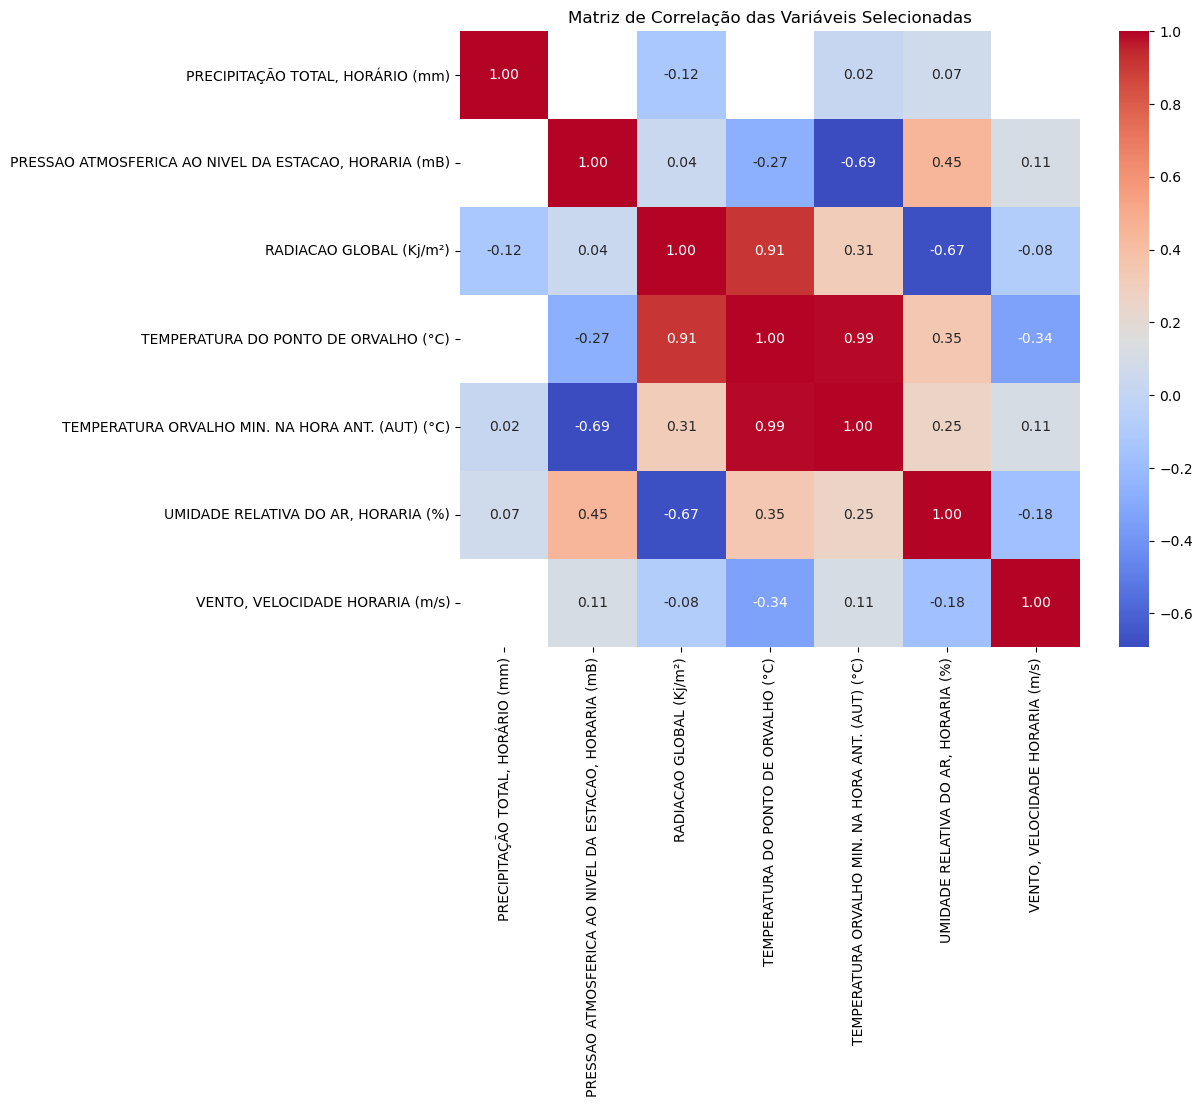

In [12]:
# Calcular a matriz de correlação especificando numeric_only=True
matriz_correlacao = df_selecionado.corr(numeric_only=True)

# Plotar a matriz de correlação usando seaborn e matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Selecionadas')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


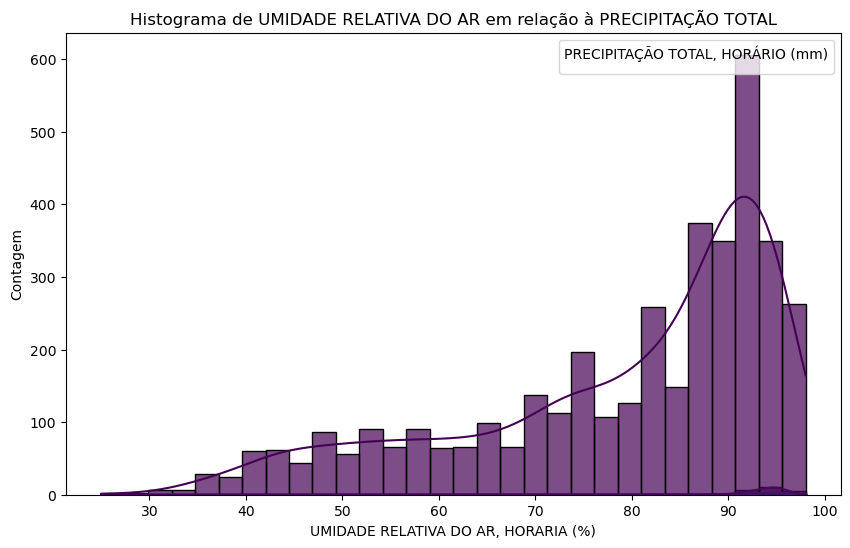

In [13]:
# Exemplo de plotagem de histograma para 'UMIDADE RELATIVA DO AR, HORARIA (%)' em relação a 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
plt.figure(figsize=(10, 6))
sns.histplot(x='UMIDADE RELATIVA DO AR, HORARIA (%)', data=df, hue='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', bins=30, kde=True, palette='viridis', alpha=0.7)
plt.title('Histograma de UMIDADE RELATIVA DO AR em relação à PRECIPITAÇÃO TOTAL')
plt.xlabel('UMIDADE RELATIVA DO AR, HORARIA (%)')
plt.ylabel('Contagem')
plt.legend(title='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', loc='upper right')
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1059 entries, 261 to 4365
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data                                                   1059 non-null   object 
 1   Hora UTC                                               1059 non-null   object 
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       1021 non-null   float64
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  98 non-null     float64
 4   RADIACAO GLOBAL (Kj/m²)                                119 non-null    float64
 5   TEMPERATURA DO PONTO DE ORVALHO (°C)                   102 non-null    float64
 6   TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)       111 non-null    float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    1059 non-null   float64
 8   VENTO, VELOCIDADE HORARIA (m/s)                     

In [46]:
X = df[['Data','PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (Kj/m²)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)', 
        'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, VELOCIDADE HORARIA (m/s)']]

# Variável alvo (o que queremos prever)
y = df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

In [48]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Converter a coluna 'Data' para timestamp
df['Data'] = df['Data'].map(pd.Timestamp.timestamp)

# Imputar valores ausentes nas outras colunas
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[['Data', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 
                              'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (Kj/m²)', 
                              'TEMPERATURA DO PONTO DE ORVALHO (°C)', 
                              'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 
                              'UMIDADE RELATIVA DO AR, HORARIA (%)', 
                              'VENTO, VELOCIDADE HORARIA (m/s)']])

# Imputar valores ausentes na variável alvo y
y = imputer.fit_transform(df[['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']]).ravel()  # .ravel() para garantir que y seja um array 1D


In [49]:
def paramgrid(model_type): #função paramgrid, sendo o parametro o modelo
    if model_type == 'ridge' or model_type == 'lasso':
        param_grid = {'alpha': np.logspace(-4, 4, 50)}
    elif model_type == 'elasticnet':
        param_grid = {'alpha': np.logspace(-4, 4, 50), 'l1_ratio': np.linspace(0.1, 1.0, 10)}
    else:
        raise ValueError("Model type not supported")

    aleatorio_alpha = random.choice(param_grid['alpha'])
    if 'l1_ratio' in param_grid:
        aleatorio_l1_ratio = random.choice(param_grid['l1_ratio'])
        return {'alpha': aleatorio_alpha, 'l1_ratio': aleatorio_l1_ratio}
    else:
        return {'alpha': aleatorio_alpha}

In [50]:
def cross_validation_kfold_random_search(model, X, y, k=10, n_iter=50):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(model, n_iter=n_iter, cv=kf, random_state=42)
    random_search.fit(X, y)
    best_model = random_search.best_estimator_
    return best_model

In [51]:
ridge_params = paramgrid('ridge')
lasso_params = paramgrid('lasso')
elasticnet_params = paramgrid('elasticnet')

In [52]:
ridge_model = Ridge(**ridge_params)  # Inicializar modelo Ridge com parâmetros aleatórios
ridge_model.fit(X, y)  # Ajustar modelo
ridge_score = ridge_model.score(X, y)  # Avaliar modelo
print(f'Ridge R2 Score: {ridge_score}')  # Imprimir R2 Score do Ridge

# Treinar e avaliar o modelo Lasso
lasso_model = Lasso(**lasso_params)  # Inicializar modelo Lasso com parâmetros aleatórios
lasso_model.fit(X, y)  # Ajustar modelo
lasso_score = lasso_model.score(X, y)  # Avaliar modelo
print(f'Lasso R2 Score: {lasso_score}')  # Imprimir R2 Score do Lasso

# Treinar e avaliar o modelo ElasticNet
elasticnet_model = ElasticNet(**elasticnet_params)  # Inicializar modelo ElasticNet com parâmetros aleatórios
elasticnet_model.fit(X, y)  # Ajustar modelo
elasticnet_score = elasticnet_model.score(X, y)  # Avaliar modelo
print(f'ElasticNet R2 Score: {elasticnet_score}')  # Imprimir R2 Score do ElasticNet

Ridge R2 Score: 0.9999999999726062
Lasso R2 Score: 0.0020288871210206727
ElasticNet R2 Score: 0.9999999858458893


In [64]:
# Filtrar o intervalo de datas
start_date = '2024-06-20'
end_date = '2024-06-30'
mask = (df['Data'] >= start_date) & (df['Data'] <= end_date)
df_interval = df.loc[mask]

# Preparar os dados para imputação
X_interval = df_interval[['Data', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 
                           'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (Kj/m²)', 
                           'TEMPERATURA DO PONTO DE ORVALHO (°C)', 
                           'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 
                           'UMIDADE RELATIVA DO AR, HORARIA (%)', 
                           'VENTO, VELOCIDADE HORARIA (m/s)']]

# Converter a coluna 'Data' para timestamp se necessário
# Aqui assumimos que a coluna 'Data' está em formato float que representa timestamp em segundos
# Se necessário, converta de volta para datetime e depois para timestamp
if pd.api.types.is_datetime64_any_dtype(df['Data']):
    X_interval['Data'] = X_interval['Data'].map(pd.Timestamp.timestamp)

# Imputar valores ausentes
imputer = SimpleImputer(strategy='mean')
X_interval_imputed = imputer.fit_transform(X_interval)

# Fazer previsões
elasticnet_model = ElasticNet(**elasticnet_params)  # Usar parâmetros otimizados
elasticnet_model.fit(X, y)  # Treinar o modelo com os dados completos
predictions = elasticnet_model.predict(X_interval_imputed)

# Adicionar previsões ao DataFrame
df_interval['Predicted_Precipitation'] = predictions

# Exibir as previsões
print(df_interval[['Data', 'Predicted_Precipitation']])

# Calcular a probabilidade de chuva (por exemplo, usando um limiar)
threshold = 0.1  # Limiar para considerar como chuva
df_interval['Chuva'] = df_interval['Predicted_Precipitation'] > threshold
print(df_interval[['Data', 'Predicted_Precipitation', 'Chuva']])


           Data  Predicted_Precipitation
4104 2024-06-20             7.357682e-07
4105 2024-06-20             7.357682e-07
4106 2024-06-20             7.357682e-07
4107 2024-06-20             7.357682e-07
4108 2024-06-20             7.357682e-07
...         ...                      ...
4363 2024-06-30            -5.244201e-07
4364 2024-06-30            -5.244201e-07
4365 2024-06-30            -5.244201e-07
4366 2024-06-30            -5.244201e-07
4367 2024-06-30            -5.244201e-07

[264 rows x 2 columns]
           Data  Predicted_Precipitation  Chuva
4104 2024-06-20             7.357682e-07  False
4105 2024-06-20             7.357682e-07  False
4106 2024-06-20             7.357682e-07  False
4107 2024-06-20             7.357682e-07  False
4108 2024-06-20             7.357682e-07  False
...         ...                      ...    ...
4363 2024-06-30            -5.244201e-07  False
4364 2024-06-30            -5.244201e-07  False
4365 2024-06-30            -5.244201e-07  False
4366

C:\Users\monica\AppData\Local\Temp\ipykernel_5160\3267144859.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_interval['Data'] = X_interval['Data'].map(pd.Timestamp.timestamp)
C:\Users\monica\AppData\Local\Temp\ipykernel_5160\3267144859.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interval['Predicted_Precipitation'] = predictions
C:\Users\monica\AppData\Local\Temp\ipykernel_5160\3267144859.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try